<a href="https://colab.research.google.com/github/ChanDingZhe0924/Practical-Discrete-Mathematics/blob/master/OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write python code in Google Colab for the following.yopu are allowed to us eany GENAI to guide you.For each question,you may use different image.
1. load any creative common image of wikipedia.Enlarge the image double of it size.
2. Transpose the image 90 degree.
3. remove the background of the image.Only maintain the character.
4. Find creative common images online. Combine these 2 images side by side vertically. Export it as JPG.
5. Change the image color to gray tone.
6. Post the Google colab into your github/ practical - discreate-mathematics repository.Submit the github link in current webinar chat room.
Once done you may siogn attendance and dismiss.

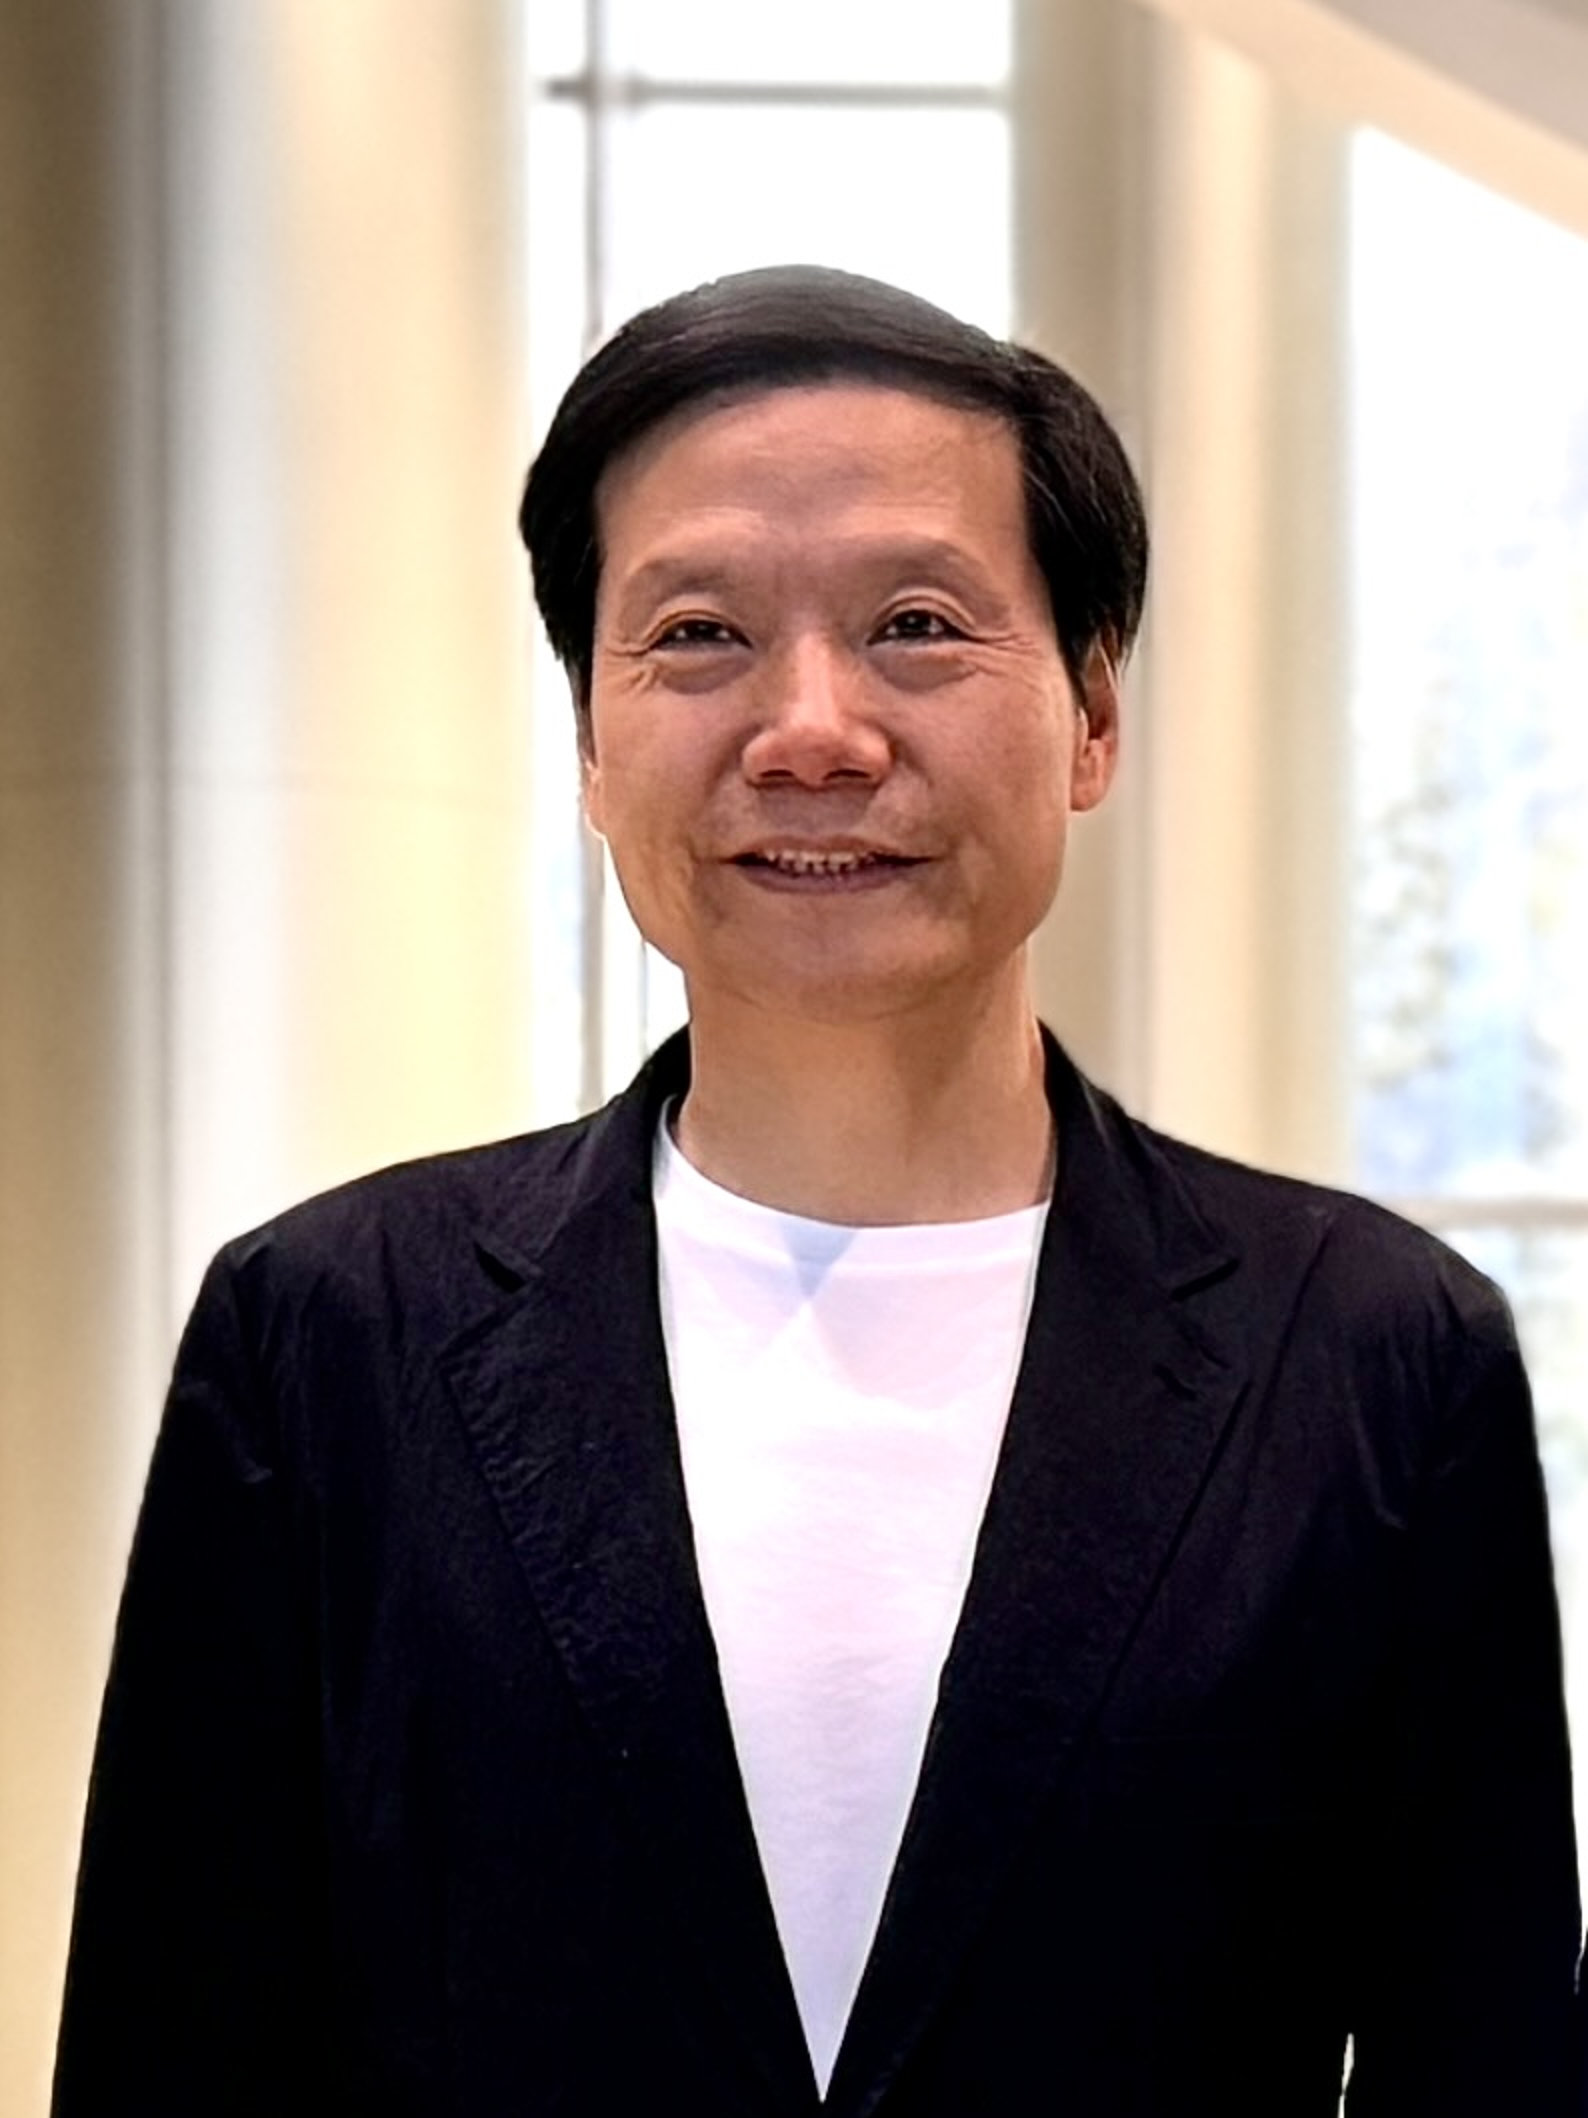

In [8]:
from PIL import Image
import requests
from io import BytesIO

# Load the image from the URL
response = requests.get("https://upload.wikimedia.org/wikipedia/commons/9/97/%E9%9B%B7%E5%86%9B_2024-09-13.jpg")
image = Image.open(BytesIO(response.content))

# Double the image size
width, height = image.size
enlarged_image = image.resize((width * 2, height * 2))

# Display the enlarged image (optional)
display(enlarged_image)

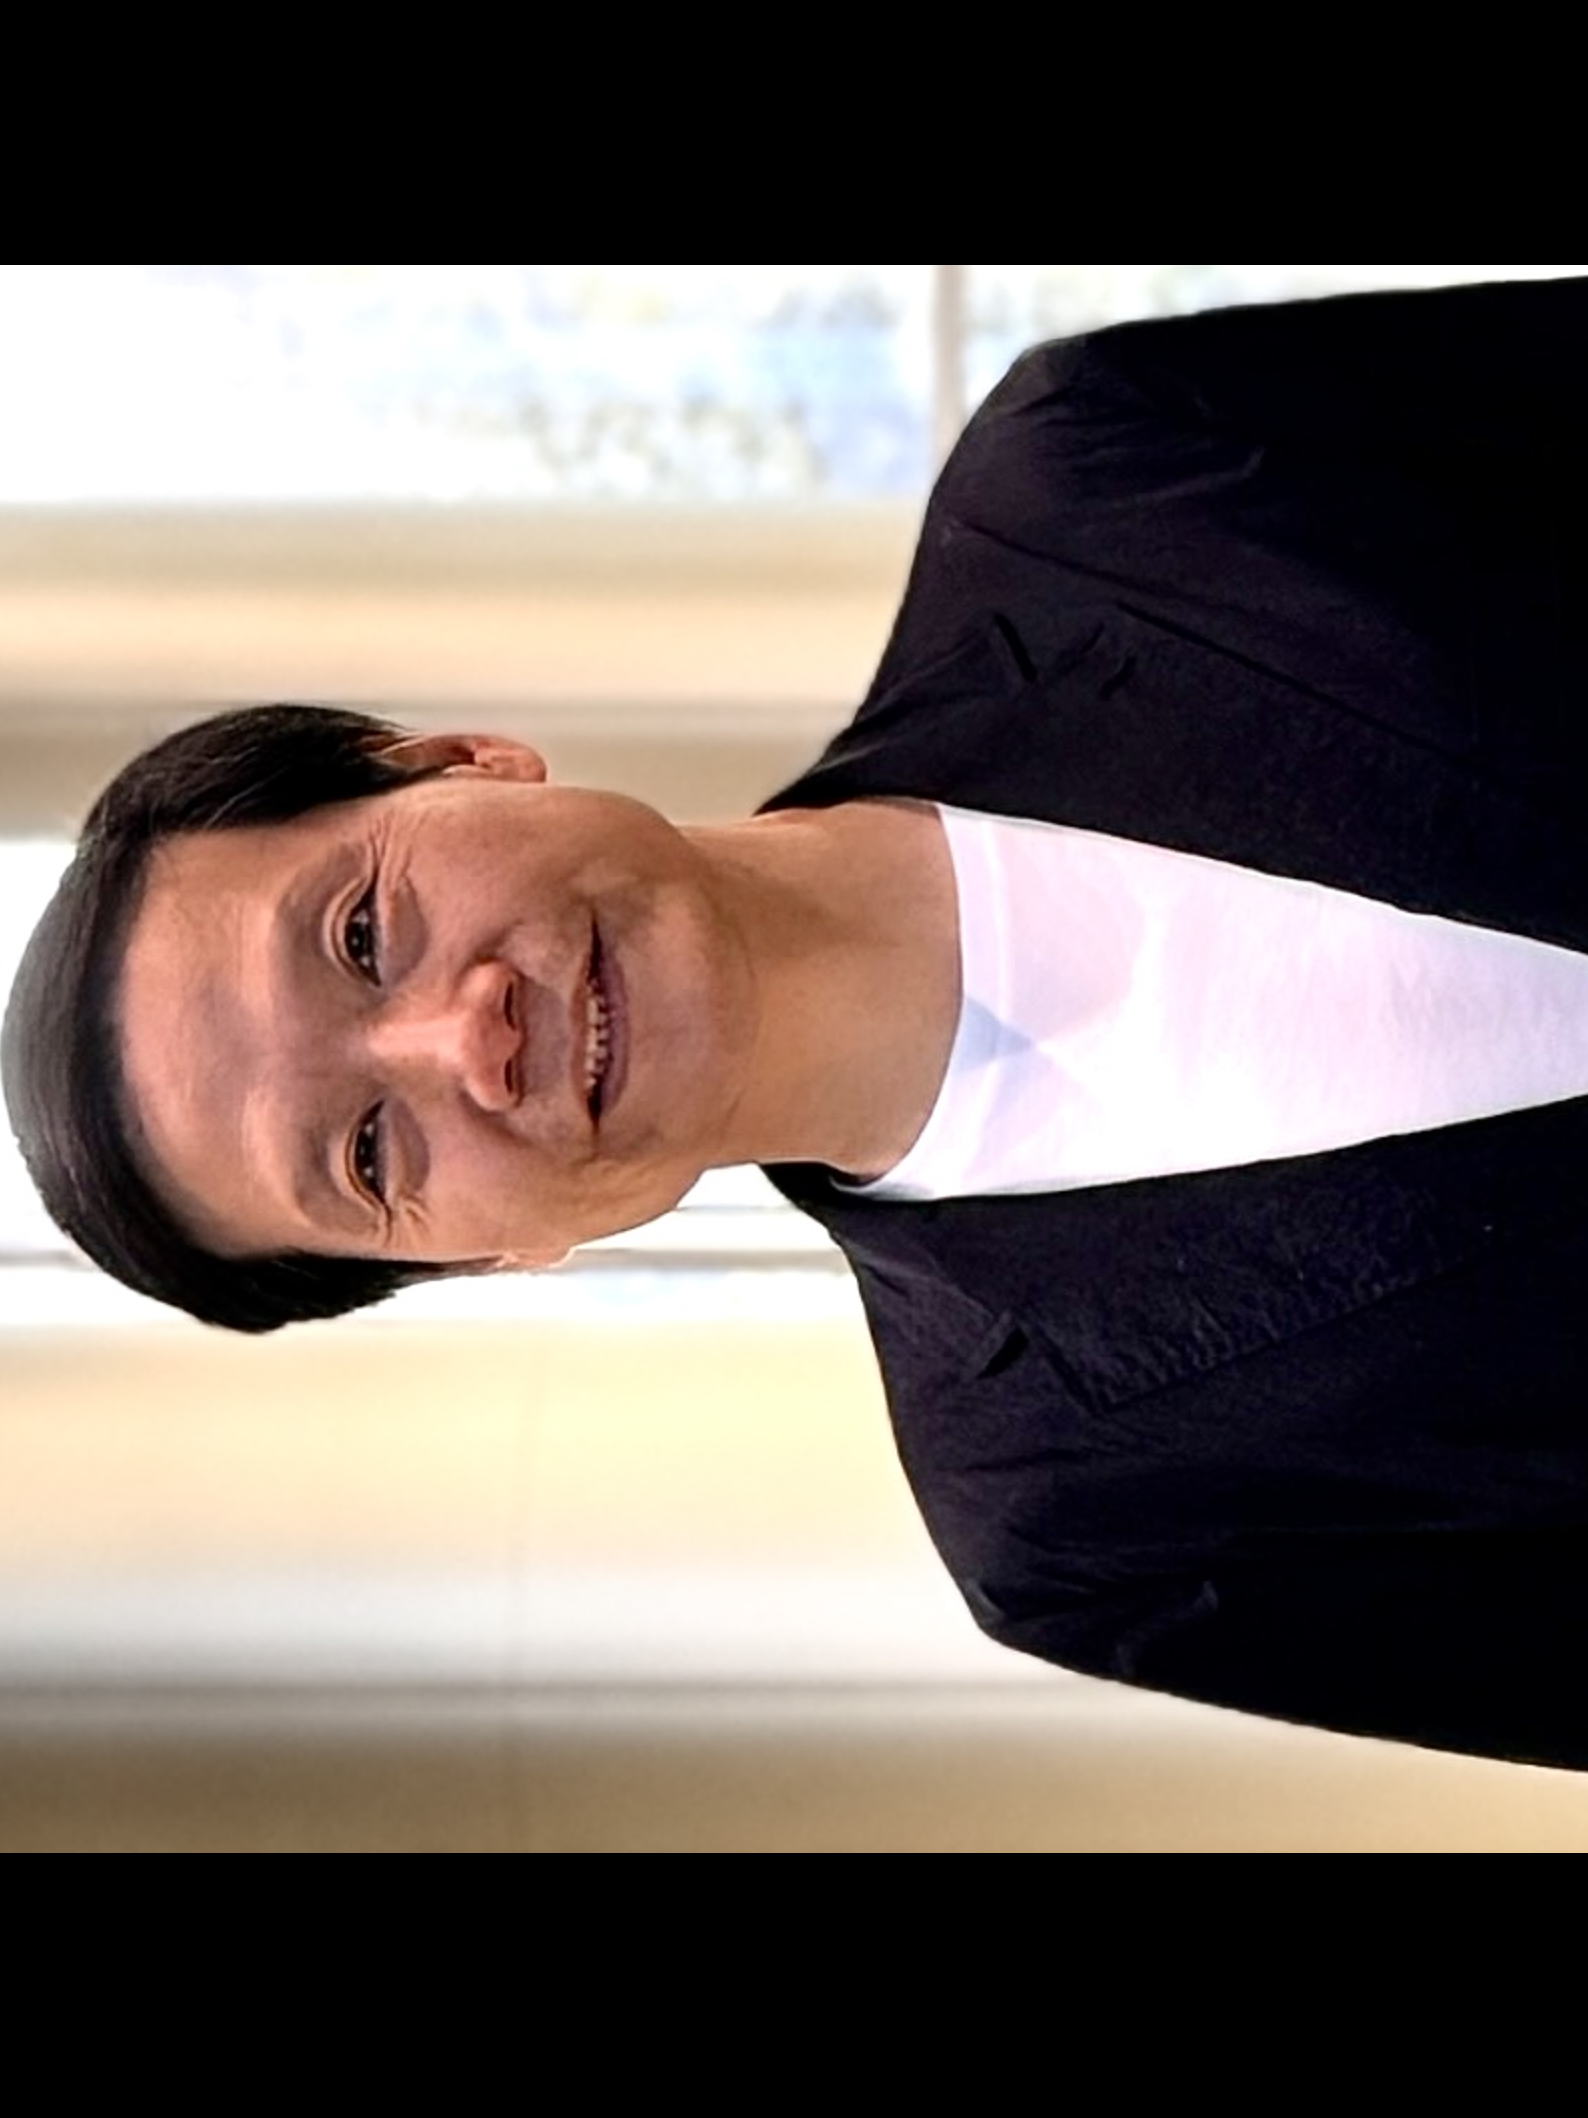

In [9]:
# Rotate the image 90 degrees counterclockwise
rotated_image = enlarged_image.rotate(90)

# Display the rotated image (optional)
display(rotated_image)

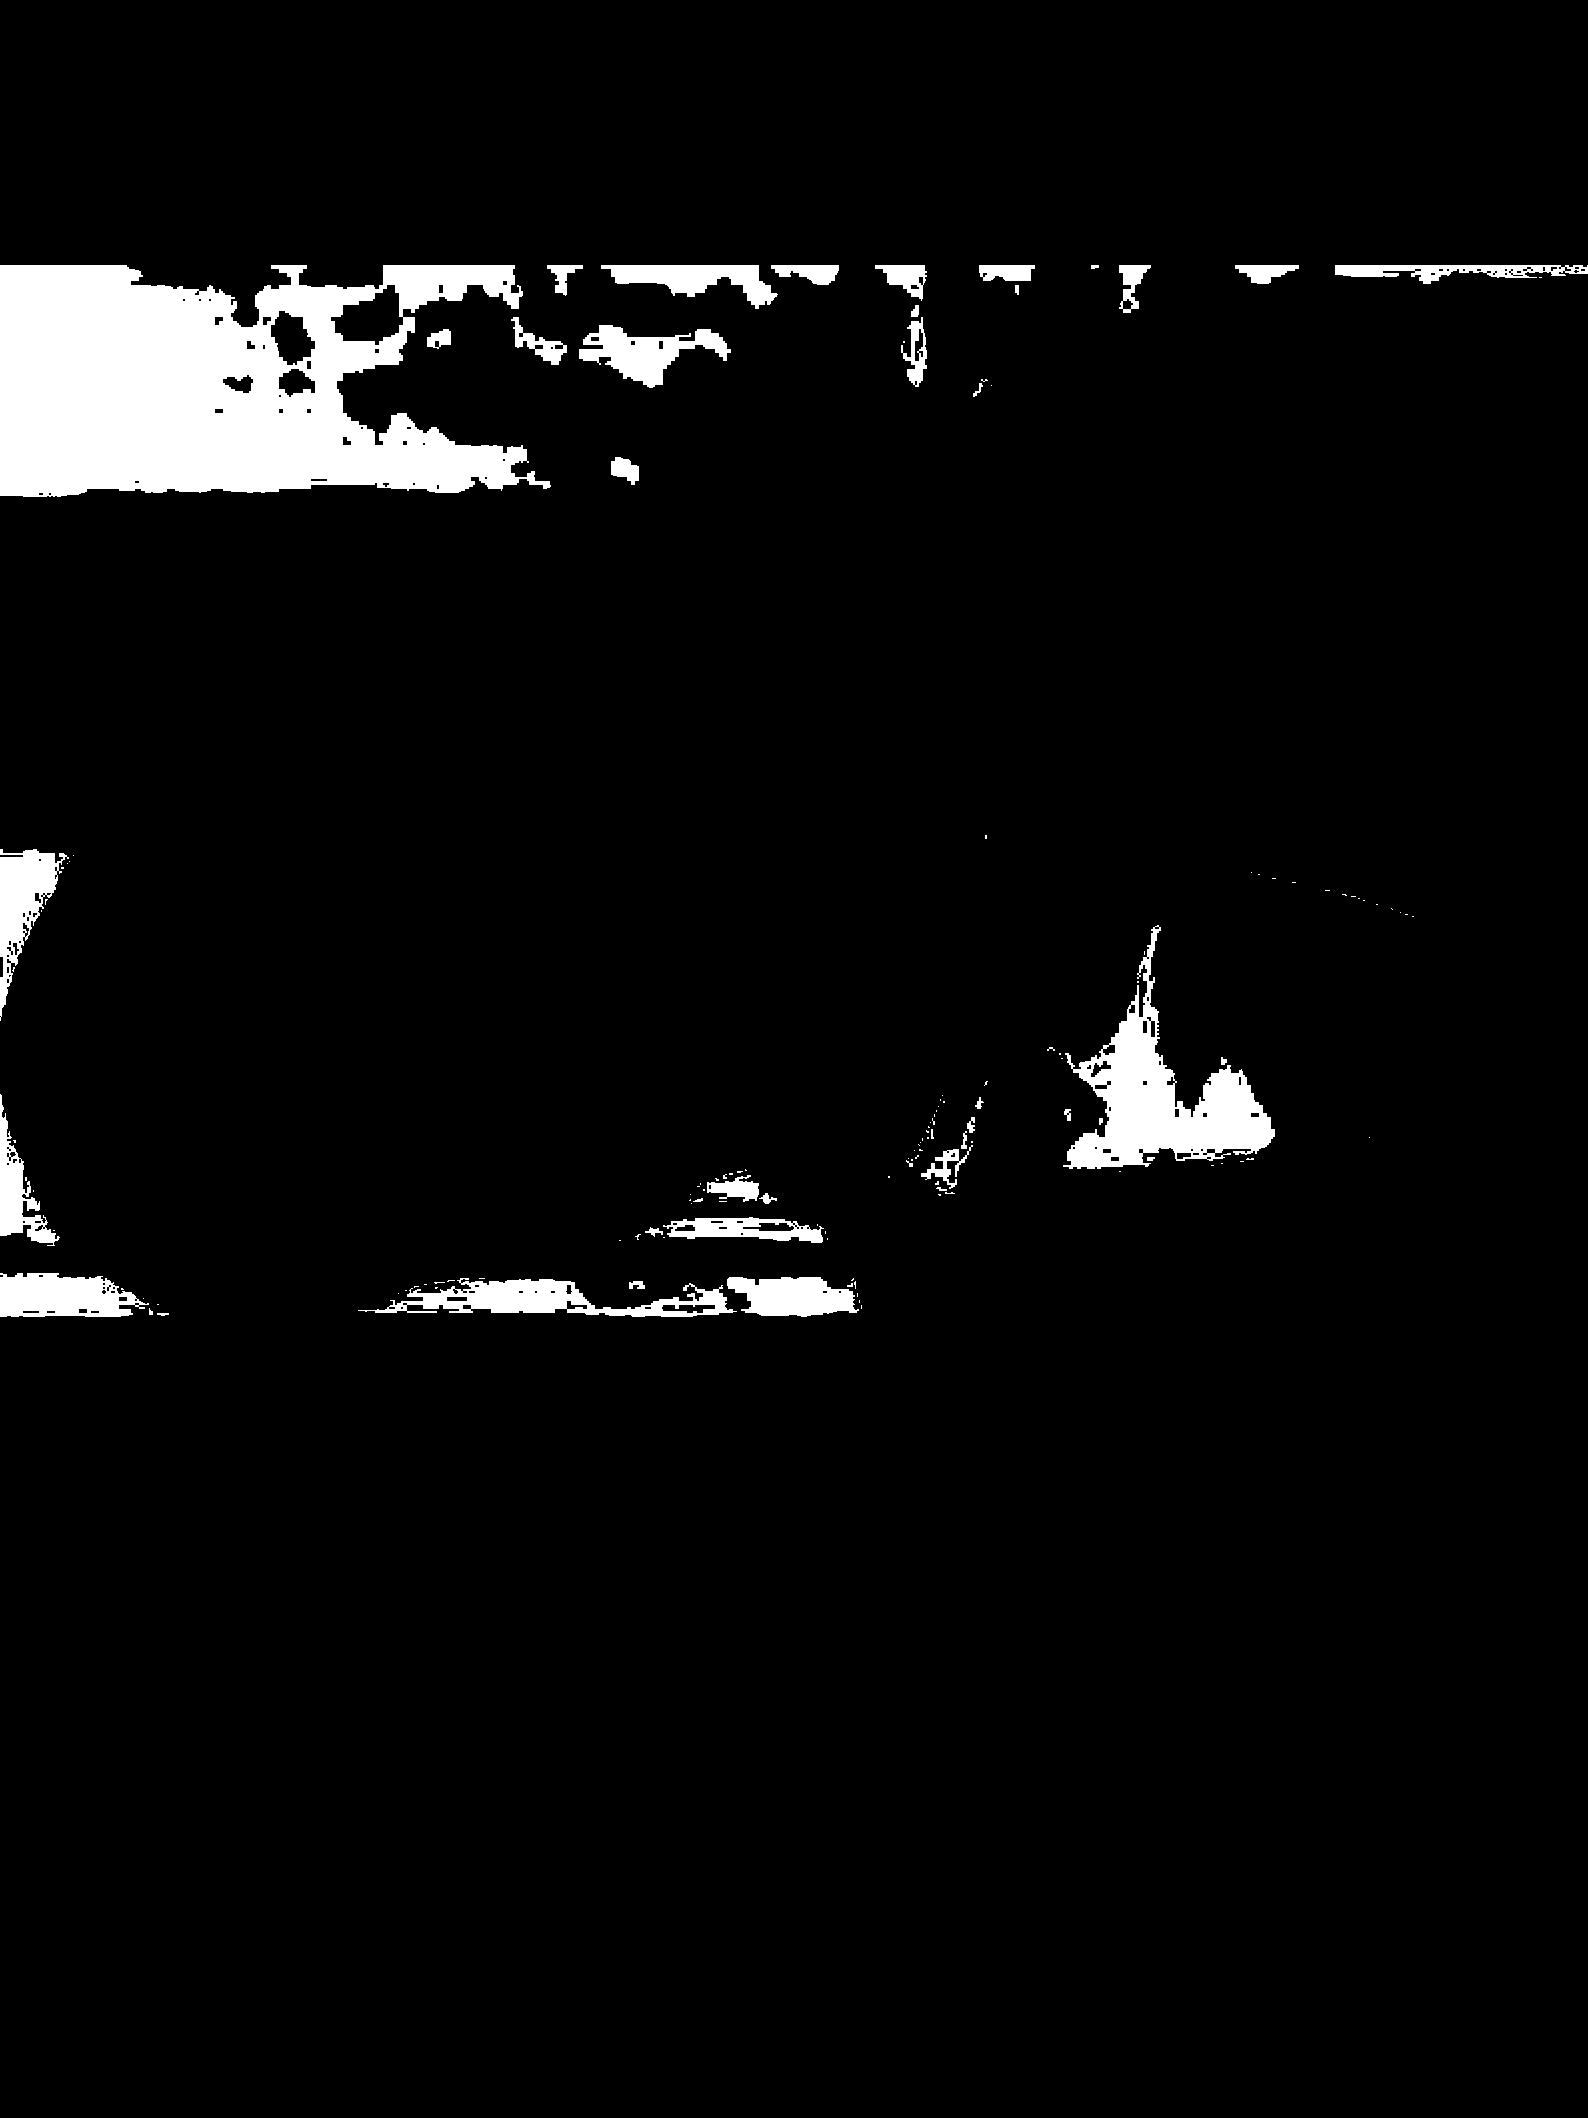

In [31]:
# Convert the image to RGB
rgb_image = rotated_image.convert("RGB")

# Define the threshold color (adjust as needed)
threshold_color = (255, 255, 255)  # White

# Create a mask for the background
background_mask = Image.new("L", rgb_image.size, 0)
for x in range(rgb_image.width):
    for y in range(rgb_image.height):
        if rgb_image.getpixel((x, y)) == threshold_color:
            background_mask.putpixel((x, y), 255)

# Remove the background
background_removed_image = Image.composite(
    rotated_image, Image.new("RGB", rotated_image.size), background_mask
)

# Display the image with background removed (optional)
display(background_removed_image)

In [37]:
from PIL import Image
import requests
from io import BytesIO

def combine_images_vertically(image_list, image_urls):
    """Combines a list of images with images loaded from URLs vertically.

    Args:
        image_list: A list of PIL.Image objects.
        image_urls: A list of image URLs.

    Returns:
        A PIL.Image object representing the combined image.
    """
    images = image_list[:]  # Start with the initial image list

    # Load images from URLs and append them to the list
    for url in image_urls:
        response = requests.get(url)
        image = Image.open(BytesIO(response.content))
        # Convert the image to RGB if necessary
        if image.mode != 'RGB':
            image = image.convert('RGB')
        images.append(image)

    # Get the total width and height
    widths, heights = zip(*(i.size for i in images))
    total_width = max(widths)
    total_height = sum(heights)

    # Create a new image with the combined dimensions
    combined_image = Image.new('RGB', (total_width, total_height))

    # Paste each image into the combined image
    y_offset = 0
    for im in images:
        combined_image.paste(im, (0, y_offset))
        y_offset += im.size[1]

    return combined_image


# ... (Your existing code for loading and processing the first image) ...

image_background = [background_removed_image]
image_urls = [
    "https://upload.wikimedia.org/wikipedia/commons/thumb/f/fc/%28CHN-Shanghai%29_Private_Xiaomi_SU7_%E6%B2%AAA7WE106_2024-11-24.jpg/1920px-%28CHN-Shanghai%29_Private_Xiaomi_SU7_%E6%B2%AAA7WE106_2024-11-24.jpg"
]

combined_image = combine_images_vertically(image_background, image_urls)

# Rotate the combined image 90 degrees counterclockwise
combined_image = combined_image.rotate(90, expand=True) # expand=True to prevent cropping

combined_image.show()

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x7f78745046d0>